Final Project - Group 1 - AAI 530

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.ensemble import IsolationForest

# Load the cleaned dataset
file_path = "cleaned_indoor_air_quality.csv"  # Updated file path
df = pd.read_csv(file_path)


The Elbow Method plot provides a visual guide for determining the optimal number of clusters (k) for our K-Means analysis.  By examining the plot, we can identify the "elbow" point, which represents the value of k where increasing the number of clusters provides diminishing returns in terms of reducing within-cluster variance.  This point suggests a balance between capturing the underlying data structure and avoiding overfitting.  Once we've identified the optimal k from the graph, we can confidently proceed with the K-Means clustering algorithm.

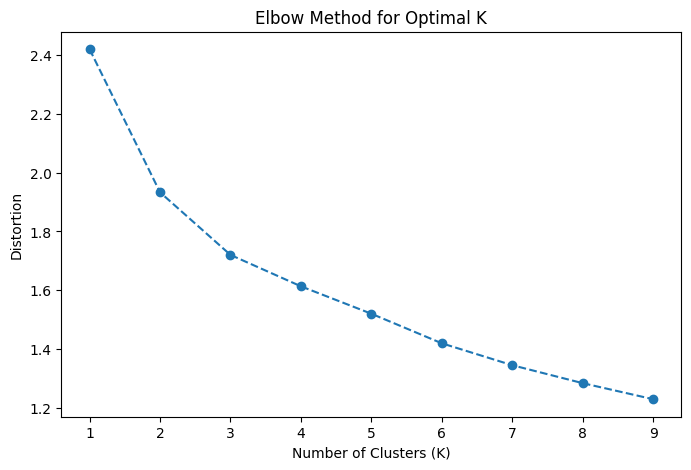

In [3]:
# Selecting relevant features for clustering
features = ['CO_ppm', 'AirQuality', 'Temperature', 'Humidity', 'eCO2_ppm', 'TVOC_ppb', 'DustDensity_ugm3']
X = df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

# Plotting the Elbow Method result
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

For our clustering analysis, we explored two different approaches.  First, we used K-Means, which aims to partition the data into a pre-defined number of clusters.  In our case, the Elbow Method suggested three clusters as an optimal balance between minimizing within-cluster variance and avoiding overfitting.  It's important to remember that K-Means works best when the clusters are relatively spherical and well-separated – think distinct groups.

We also employed DBSCAN, which takes a different tack.  Instead of assuming a fixed number of clusters, DBSCAN identifies clusters based on data point density.  A key advantage of DBSCAN is its ability to handle irregularly shaped clusters and, importantly, identify noise or outlier points. These outliers, often labeled as -1, represent data points that don't neatly fall into any defined cluster.  This makes DBSCAN a valuable tool for anomaly detection alongside its clustering capabilities.

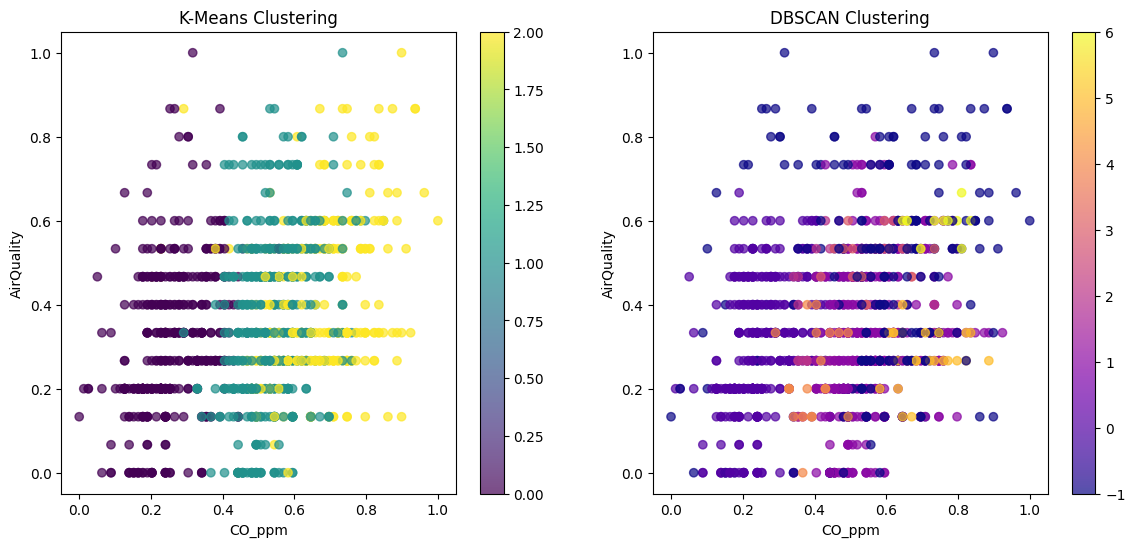

In [4]:
# Applying K-Means with optimal K (choosing based on elbow method)
optimal_k = 3  # Adjust if needed based on the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=10)  # Adjusting parameters for better grouping
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualizing the clustering results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means clustering visualization
scatter1 = axes[0].scatter(df['CO_ppm'], df['AirQuality'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
axes[0].set_xlabel('CO_ppm')
axes[0].set_ylabel('AirQuality')
axes[0].set_title('K-Means Clustering')
plt.colorbar(scatter1, ax=axes[0])

# DBSCAN clustering visualization
scatter2 = axes[1].scatter(df['CO_ppm'], df['AirQuality'], c=df['DBSCAN_Cluster'], cmap='plasma', alpha=0.7)
axes[1].set_xlabel('CO_ppm')
axes[1].set_ylabel('AirQuality')
axes[1].set_title('DBSCAN Clustering')
plt.colorbar(scatter2, ax=axes[1])

plt.show()


Isolation Forest

The Isolation Forest model has identified potential outliers within the air quality dataset.  These outliers, visualized as red points, represent anomalous readings that deviate significantly from the expected data distribution.  Conversely, blue points represent data conforming to typical patterns.

This analysis serves to detect abrupt fluctuations in both carbon monoxide (CO) levels and overall Air Quality Index (AQI) values.  The identification of such anomalies is crucial for distinguishing between genuine environmental events, such as pollution spikes, and potential sensor malfunctions requiring technical attention.  This distinction enables more accurate environmental monitoring and facilitates timely intervention when necessary.

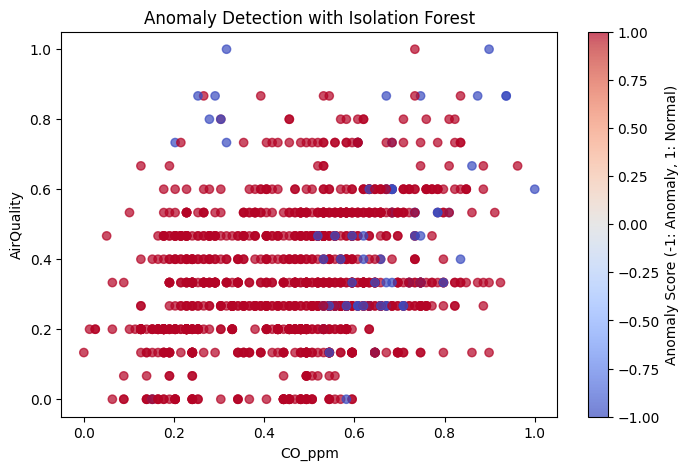

In [5]:
# Applying Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(X_scaled)

# Visualizing anomalies
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df['CO_ppm'], df['AirQuality'], c=df['Anomaly_Score'], cmap='coolwarm', alpha=0.7)
plt.xlabel('CO_ppm')
plt.ylabel('AirQuality')
plt.title('Anomaly Detection with Isolation Forest')
plt.colorbar(scatter, label="Anomaly Score (-1: Anomaly, 1: Normal)")
plt.show()